In [61]:
country.code <- 'sg'  # use yours
url.pattern <- 'https://'  # use http if you want
repo.data.frame <- subset(getCRANmirrors(), CountryCode == country.code & grepl(url.pattern, URL))
options(repos = repo.data.frame$URL)

In [62]:
install.packages("ggmap")
install.packages("DT")

Warning message:
"package 'ggmap' is in use and will not be installed"Warning message:
"package 'DT' is in use and will not be installed"

In [63]:
apr14 <- read.csv("dataset/uber_data_set/uber-raw-data-apr14.csv")
may14 <- read.csv("dataset/uber_data_set/uber-raw-data-may14.csv")
jun14 <- read.csv("dataset/uber_data_set/uber-raw-data-jun14.csv")
jul14 <- read.csv("dataset/uber_data_set/uber-raw-data-jul14.csv")
aug14 <- read.csv("dataset/uber_data_set/uber-raw-data-aug14.csv")
sep14 <- read.csv("dataset/uber_data_set/uber-raw-data-sep14.csv") 

In [64]:
library(dplyr)
data14 <- bind_rows(apr14, may14, jun14, jul14, aug14, sep14)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"

In [65]:
library(lubridate)
# Separate or mutate the Date/Time columns
data14$Date.Time <- mdy_hms(data14$Date.Time)
data14$Year <- factor(year(data14$Date.Time))
data14$Month <- factor(month(data14$Date.Time))
data14$Day <- factor(day(data14$Date.Time))
data14$Weekday <- factor(wday(data14$Date.Time))
data14$Hour <- factor(hour(data14$Date.Time))
data14$Minute <- factor(minute(data14$Date.Time))
data14$Second <- factor(second(data14$Date.Time))

In [66]:
head(data14, n=10)


Date.Time,Lat,Lon,Base,Year,Month,Day,Weekday,Hour,Minute,Second
2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,4,1,3,0,11,0
2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,4,1,3,0,17,0
2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,4,1,3,0,21,0
2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,4,1,3,0,28,0
2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,4,1,3,0,33,0
2014-04-01 00:33:00,40.7383,-74.0403,B02512,2014,4,1,3,0,33,0
2014-04-01 00:39:00,40.7223,-73.9887,B02512,2014,4,1,3,0,39,0
2014-04-01 00:45:00,40.7620,-73.9790,B02512,2014,4,1,3,0,45,0
2014-04-01 00:55:00,40.7524,-73.9960,B02512,2014,4,1,3,0,55,0
2014-04-01 01:01:00,40.7575,-73.9846,B02512,2014,4,1,3,1,1,0


In [56]:
?kmeans

In [73]:
set.seed(20)
clusters <- kmeans(data14[,2:3], 5)

# Save the cluster number in the dataset as column 'Borough'
data14$Borough <- as.factor(clusters$cluster)

In [74]:
# Inspect 'clusters'
str(clusters)

List of 9
 $ cluster     : int [1:4534327] 3 4 4 3 3 4 4 3 4 3 ...
 $ centers     : num [1:5, 1:2] 40.7 40.8 40.8 40.7 40.7 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:5] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "Lat" "Lon"
 $ totss       : num 22107
 $ withinss    : num [1:5] 1386 1264 948 2787 1029
 $ tot.withinss: num 7414
 $ betweenss   : num 14692
 $ size        : int [1:5] 145109 217566 1797598 1802301 571753
 $ iter        : int 4
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


#### Output definition

**cluster:** a vector of integers (from 1:k) indicating the cluster to which each point is allocated.

**centers:** a matrix of cluster centers.

**withinss:** vector of within-cluster sum of squares, one component per cluster.

**tot.withinss:** total within-cluster sum of squares. That is, sum(withinss).

**size:** the number of points in each cluster.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=New+York&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20York&sensor=false
Warning message:
"Removed 10062 rows containing missing values (geom_point)."

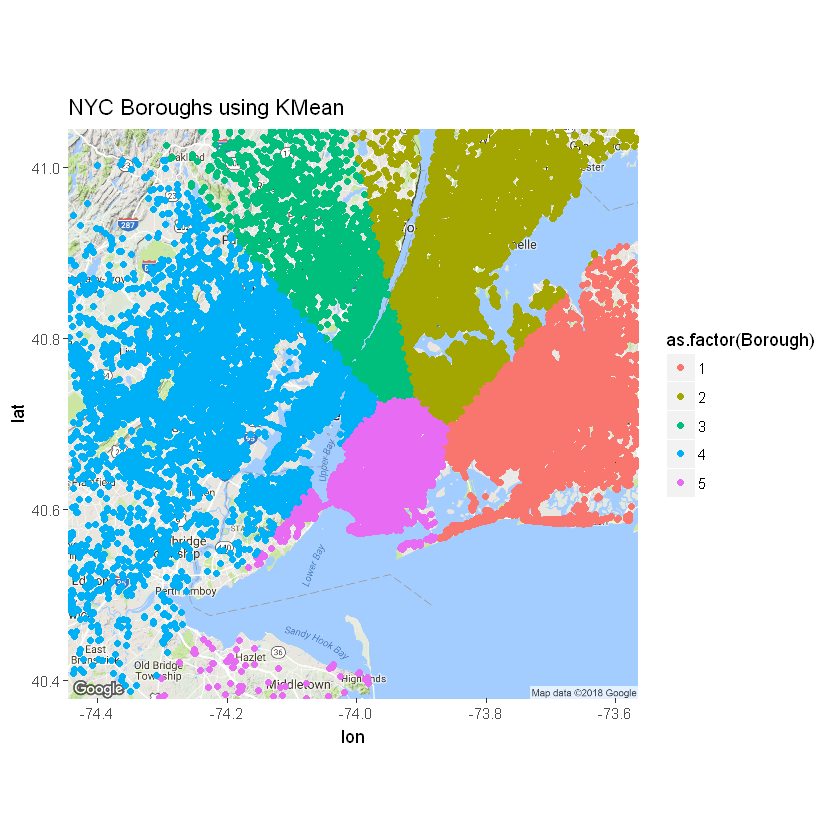

In [75]:
library(ggmap)

NYCMap <- get_map("New York", zoom = 10)
ggmap(NYCMap) + geom_point(aes(x = Lon[], y = Lat[], colour = as.factor(Borough)),data = data14) +
  ggtitle("NYC Boroughs using KMean")

In [76]:
library(DT)

data14$Month <- as.double(data14$Month)
month_borough_14 <- count_(data14, vars = c('Month', 'Borough'), sort = TRUE) %>% 
  arrange(Month, Borough)
datatable(month_borough_14)

ERROR while rich displaying an object: Error in htmlwidgets::saveWidget(obj, htmlfile): Saving a widget with selfcontained = TRUE requires pandoc. For details see:
https://github.com/rstudio/rmarkdown/blob/master/PANDOC.md

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.htmlwidget(obj)
9. htmlwidgets::saveWidget(obj, htmlfile)
10. stop("Saving a widget with selfcontained = TRUE requires pandoc. For details see:\n", 

HTML widgets cannot be represented in plain text (need html)

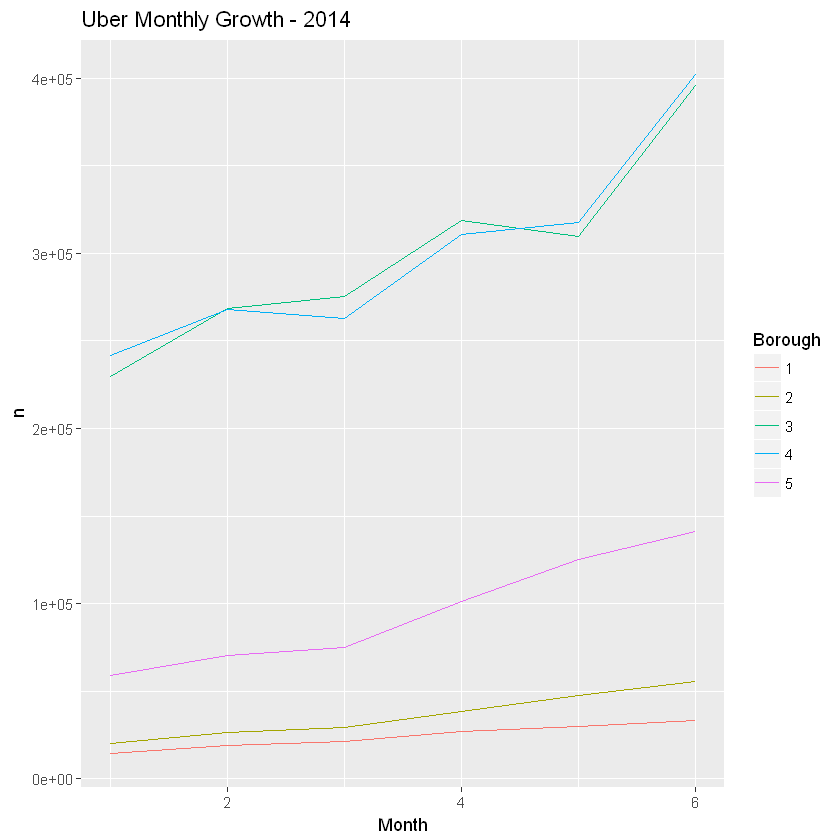

In [77]:
library(dplyr)
monthly_growth <- month_borough_14 %>%
  mutate(Date = paste("04", Month)) %>%
  ggplot(aes(Month, n, colour = Borough)) + geom_line() +
  ggtitle("Uber Monthly Growth - 2014")
monthly_growth

### New York city has five boroughs ---Brooklyn, Queens, Manhattan, Bronx, and Staten Island